# EDA on S&P500 E-mini Futures Tick Data 
High quality tick data has been sourced from Tick Data LLC at the cost of approximately 1000 USD. The focus for our research will be on S&P 500 E-mini futures, for the period 10 September 1997 - 13 February 2019. The S&P 500 E-Mini futures data is the set which de Prado regularly references in his work and by using the same set we create a natural way to benchmark our implementations.

A link to Tick Data LLC is provided: [TickDataLLC](https://www.tickdata.com/)

---

## Trade Data
### File Layout
Tick Data delivers its futures trade data in compressed, comma-delimited ASCII text files.

Prior to **Jul-1-2003**: Tick Data’s historical futures data contains only day-session pit trading activity for all markets that were not electronic-only (i.e. had pit-only or pit and electronic trading). Electronic-only markets have partial night session trading (i.e. e-Mini trading days begin at 12:00am and close on the day session close), but do not have trading volume. Prior to **Jun-30-2003**, some of our data is time stamped to the second (HH:MM:SS), but most is time stamped to the minute (HH:MM). While additional fields can be outputted via the included TickWrite software, the as-traded data contains five (5) fields:
1. Date
2. Time
3. Price (always filtered price)
4. Volume (always zero)
5. Market Flag ('P' or 'E' for Pit or Electorinc trades.

TickWrite can also output:
* Symbol
* Tick Count
* Up-Ticks
* Down-Ticks
* Date and Time (In one field)

From **Jul-1-2003 through Jun-30-2011**: Tick Data’s historical futures data contains a second stamp (HH:MM:SS), volume for all electronic trades, and the five (5) fields:
1. Date
2. Time
3. Price (always filtered price)
4. Volume (always zero)
5. Market Flag ('P' or 'E' for Pit or Electorinc trades.

From **Jul-1-2011 to Present**: Tick Data’s historical futures data contains a millisecond time stamp (HH:MM:SS.000) and includes additional information in the following eight (8) fields:
1. Date
2. Time
3. Price (always filtered price)
4. Volume (always zero)
5. Market Flag ('P' or 'E' for Pit or Electorinc trades.
6. Sales Condition (if available; see below for exchange-specific information)
7. Exclude Record Flag (flags off-exchange trades, i.e. EFPs and block trades)
8. Unfiltered Price

### Field Descriptions

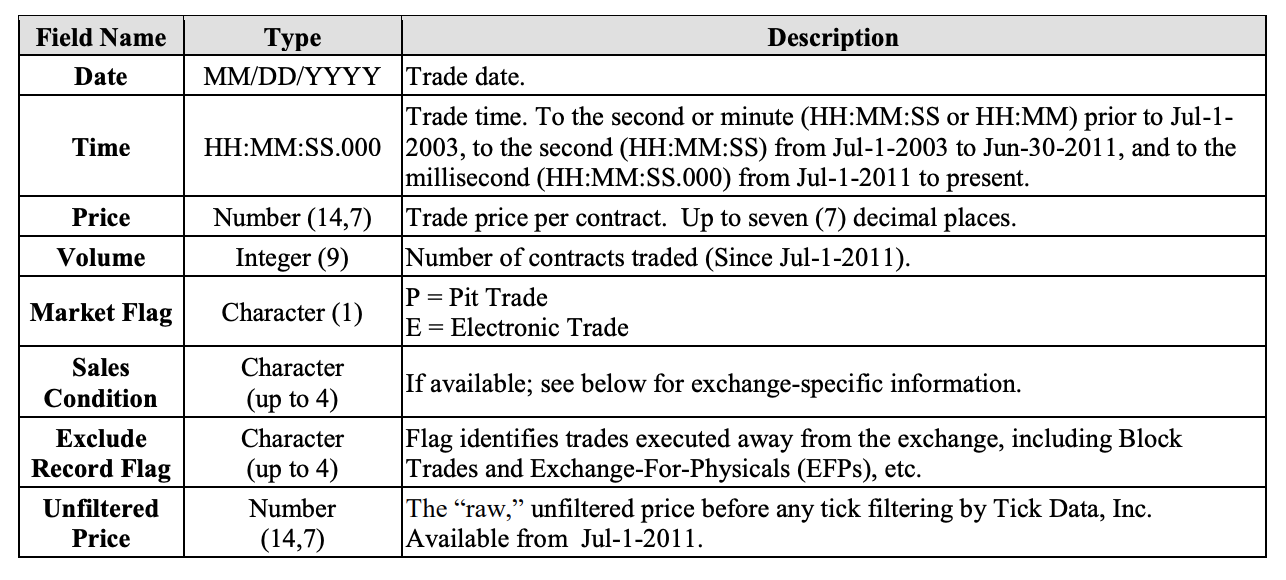

In [5]:
from IPython.display import Image
Image(filename='field_descriptions.png', width=600) 

### Futures Sales Condition Codes
#### CME Group
Includes: 
* CBOT Regular Trading Hours (RTH) Pit – US
* CBOT Electronic Markets – US
* CME Futures Regular Trading Hours (RTH) – US
* New York Commodities Exchange (COMEX) – US
* CME eMini Equity Futures – US
* New York Mercantile Exchange Energy Futures – US

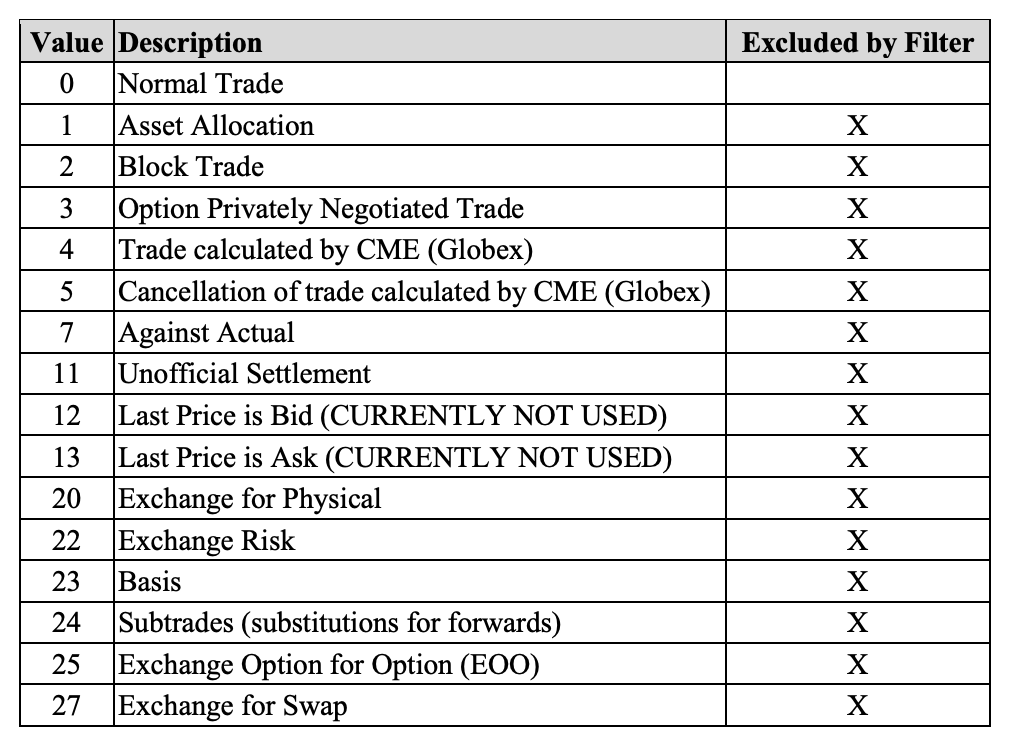

In [9]:
Image(filename='condition_codes.png', width=500) 

## Additional FAQ
**Does the data include GLOBEX, electronic or the overnight sessions?**
* Data for electronic and overnight sessions is included for all applicable markets beginning Jul-1-2003. Prior to then, our futures data contains only day session data.

**Is the E-mini data 24 hours?**
* The E-mini data, futures contracts that represent a fraction of the value of normal contracts, contains the full 24-hour session, with volume, beginning on Jul-1-2003. Prior to then, it begins each day at 12:00 a.m. and ends at 3:15 p.m. Central time.

**What is the roll method?**
* There are a variety of roll methods however the recommended method for S&P500 E-mini Futures is Most Active – AutoRoll. At a later stage we would like to apply the ETF trick (pg 33, Advances in Financial Machine Learnig). 

**What about trades that happened off exchange?**
* Trades that did not occur on the exchange, such as Exchange-For-Physicals (EFPs) and block trades are excluded by default. 
* Prior to *Jul-1-2011*, these off-exchange transactions are not found in the intraday trade data. They did not actually trade on the exchange, but since they must clear through the exchange’s clearing house, they are included in the official figures. From *Jul-1-2011 on*, these trades are in the data, though they are excluded from output by default. They can be included in the output by checking the “Use Excluded Records in Output” box under TickWrite’s Formatting/Filtering tab.

---

## EDA
* 60 days of tick data

In [1]:
import numpy as np
import pandas as pd

In [16]:
# About 2 years worth of tick data
data = pd.read_csv('es_dataES.csv')

In [18]:
data.head()

,Date and Time,Price,Volume,Market Flag,Sales Condition,Exclude Record Flag
0,09/24/2017 17:00:00.081,2499.00,344,E,0,NaN
1,09/24/2017 17:00:00.122,2499.00,1,E,0,NaN
2,09/24/2017 17:00:00.122,2499.00,1,E,0,NaN
3,09/24/2017 17:00:00.229,2498.75,1,E,0,NaN
4,09/24/2017 17:00:00.229,2498.75,1,E,0,NaN


In [22]:
data['Market Flag'].unique()

array(['E'], dtype=object)

In [23]:
data['Sales Condition'].unique()

array([0])

In [24]:
data['Exclude Record Flag'].unique()

array([nan])